(800000, 2)


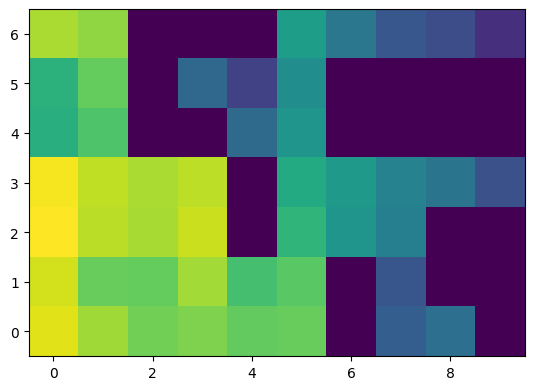

In [84]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

env_id = "PointMaze_Large_Diverse_G-v3"
env = gym.make(env_id)
coords = []
for _ in range(1000):
    obs, info = env.reset()

    while True:
        obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        # print(obs)
        first_two_coords = obs['observation'][:2]
        coords.append(first_two_coords)
        # print("x, y координаты:", first_two_coords)
        if (terminated) or (truncated):
            break

size = np.array([7, 10])
coords_array = np.array(coords)
coords_array[:, 0] += size[1] / 2

print(coords_array.shape)

visitation = np.zeros((7, 10))
for (x, y) in coords_array:
    x, y = int(x), int(y)
    visitation[y, x] += 1

plt.imshow(np.log(visitation + 1), origin='lower')
plt.show()